In [2]:
source("preset.R")

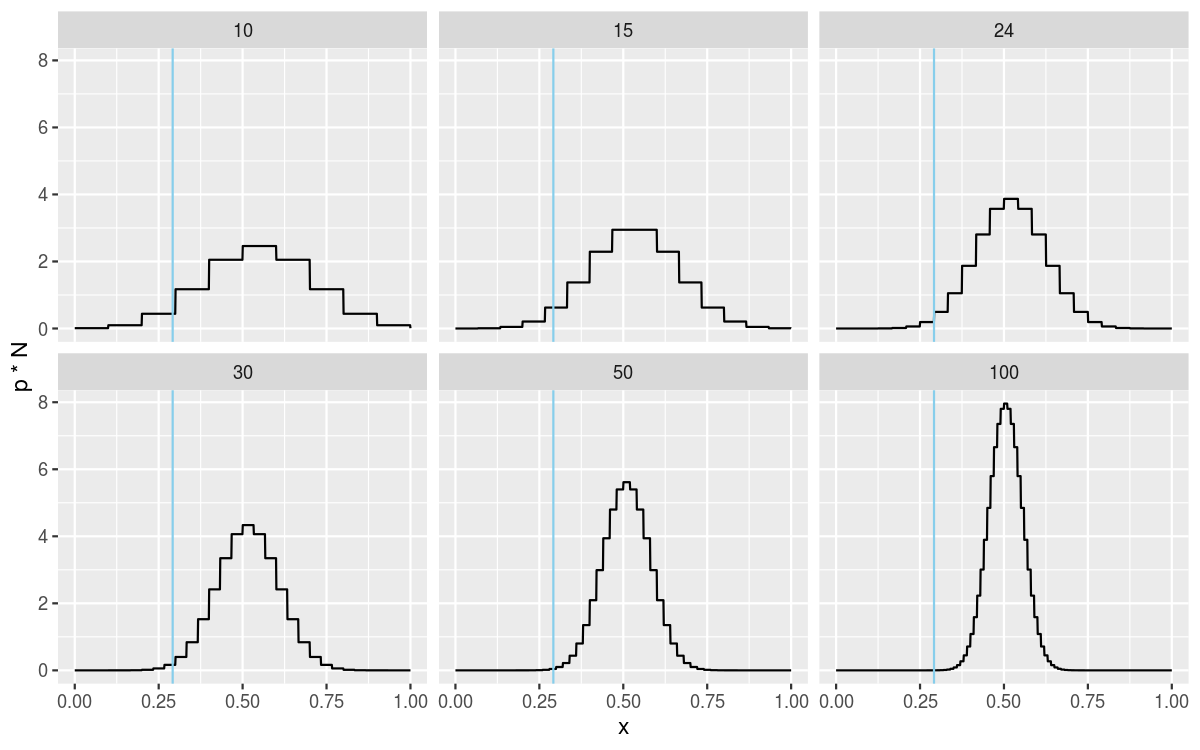

In [113]:
set_plot_size(8, 5, 150)
Ns <- tibble(N = c(10, 15, 24, 30, 50, 100))
tibble(x = seq(0, 1, length.out = 1000)) %>% 
    crossing(Ns) %>% 
    mutate(p = dbinom(floor(x * N), N, 0.5)) %>% 
    ggplot(aes(x, p * N)) + 
        geom_line() + 
        geom_vline(xintercept = Dz / DN, color = "skyblue") +
        facet_wrap(~N)

In [68]:
set_plot_size(8, 5, 150)
DN <- 24
Dz <- 7
alpha <- 0.025
grid <- tibble(N = 1:100) %>% 
    mutate(
        p = pbinom(N * Dz / DN, size = N, prob = 0.5), 
        w = dpois(N, DN), 
        w = w / sum(w), 
    ) 

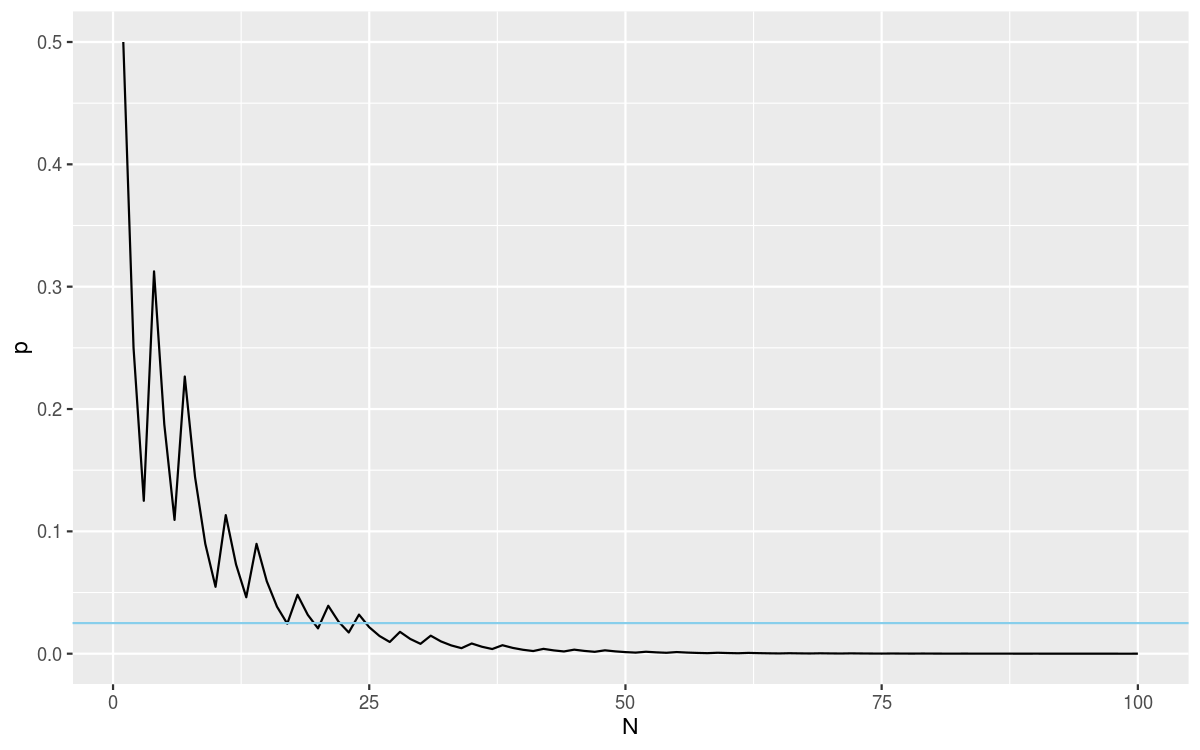

In [69]:
ggplot(grid, aes(N, p)) + 
    geom_line() + 
    geom_hline(yintercept = alpha, color = "skyblue")

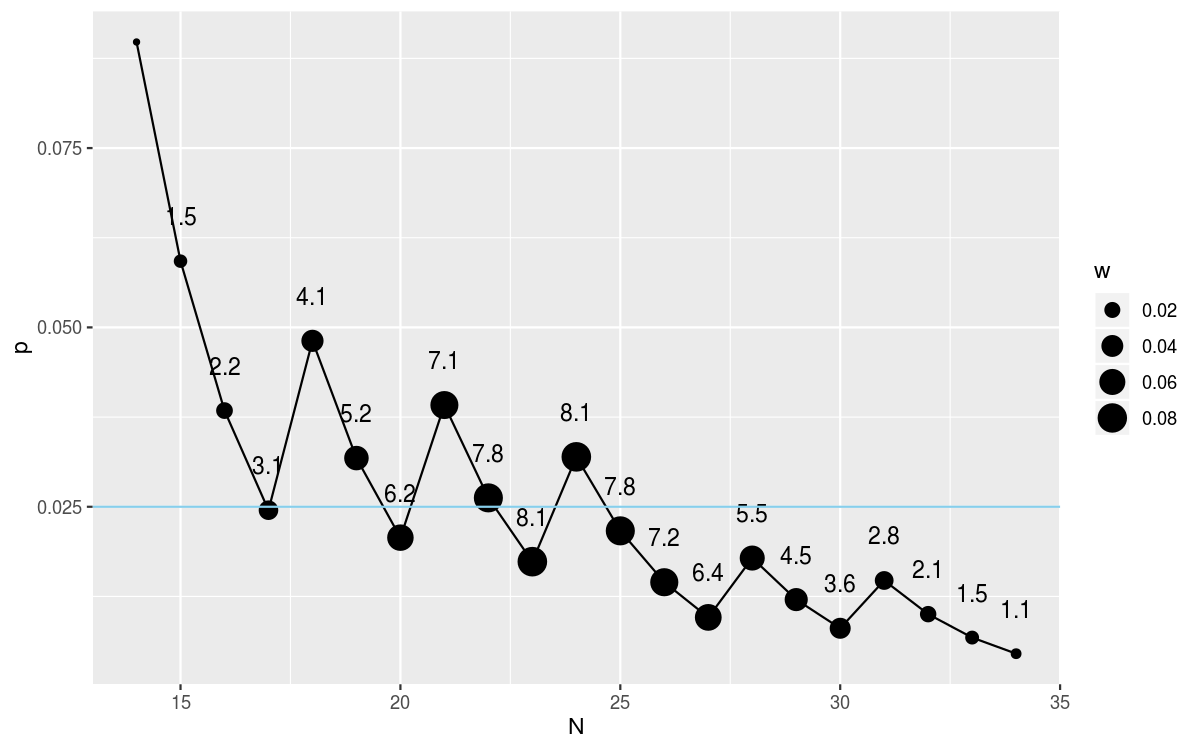

In [73]:
width <- 10
grid %>% 
    filter(DN - width <= N, N <= DN + width) %>% 
    ggplot(aes(N, p)) + 
        geom_line() + 
        geom_point(aes(size = w)) + 
        geom_text(aes(label = signif(w, 2) * 100), vjust = -2) + 
        geom_hline(yintercept = alpha, color = "skyblue")